# Telco Customer Churn Prediction

Telco adalah sebuah perusahaan yang memiliki banyak cabang yang tersebar di segala daerah. Pada tahun 2020, Telco mengalami customer churn atau kehilangan pelanggan dari suatu bisnis. Pada tahun itu, banyak pelanggan yang memutuskan untuk berhenti berlangganan produk Telco dan beralih untuk berlangganan produk serupa dari perusahaan kompetitor. 

Untuk menghentikan customer churn, pihak perusahaan memerlukan strategi baru agar Telco dapat mempertahankan loyalitas pelanggan. Oleh karena itu, perusahaan memutuskan membuat sebuah model prediksi dengan menggunakan machine learning untuk menentukan apakah pelanggan akan berhenti atau tidak.

# Dataset Information

Data Customer Churn Perusahaan Telco pada Bulan Juni 2020

Data Format : Comma Separated Values (CSV)
Data Source : https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv

Detail Data :
    
- UpdateAt : Periode of Data taken
- customerID : Customer ID
- gender : Whether the customer is a male or a female (Male, Female)
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether : the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether : the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

# A. Data Preprocessing (1)

Sebelum membuat model prediksi, data akan dibersihkan, disiapkan, dan dianalisis melalui tahap preprocessing. Pada tahap ini digunakan Library Python yaitu: 
1. Pandas : untuk analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
2. Matplotlib : untuk visualisasi data.
3. Seaborn : library tambahan untuk matplotlib.
4. Numpy : untuk pengolahan matriks dan fungsi matematika.
5. Regex : untuk pencarian karakter tertentu
6. Scikit-learn : menyediakan algoritma Machine Learning.
7. Xgboost : menyediakan algoritma extreme gradient boosting (xgboost)
8. Pickle : untuk serializing dan de-serializing dari struktur objek Python

In [1]:
#Install Package di Jupyter Notebook
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install regex
!pip install -U scikit-learn
!pip install xgboost
!pip install pickle-mixin
!pip install pathlib

# Import Library and Load Dataset

In [2]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [3]:
#Pandas Option Display Max Columns : Menyetel penampilan kolom data menjadi maksimal 50
pd.options.display.max_columns = 50

#Pandas Read CSV : Memuat/ membaca dan menyimpan dataset dalam bentuk CSV dengan nama variable df_load
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [4]:
#Copy Data : Meng-copy dan menyimpan dataset dalam nama variable df_customer
df_customer = df_load.copy()

In [5]:
#Shape : Menampilkan jumlah baris dan kolom dari dataset
df_customer.shape

(7113, 22)

In [6]:
#Head : Menampilkan 5 baris data teratas
df_customer.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Nunique : Mencari jumlah data (customerID) yang bersifat unik
df_customer.customerID.nunique()

7017

# Mencari ID Pelanggan (Nomor Telepon) yang Valid

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar.

ID Pelanggan (Nomor Telepon) yang valid memenuhi kriteria sebagai berikut:
1. Panjang karakter adalah 11-12
2. Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
3. Diawali dengan angka 45 pada 2 digit pertama

In [8]:
#Memfilter Data

#Membuat kolom bantuan 'valid_id' : Kolom bantuan baru untuk memberikan hasil pendeteksian karakter dari customer id
#Astype : mengubah tipe data (customerID) menjadi string
#Str.match dan r (regex) : mencocokkan data (customerID) sesuai karakter tertentu pada kriteria
#regex pattern : '45\d{9,10}'
# 45 --> awalan angka 2 digit pertama
# \d --> karakter yang terdiri atas digits (angka dari 0-9)
# {9, 10} --> jumlah kemunculan yang ditentukan
# Jika panjang karakternya 11 --> 11 - 2 (digit awalan) = 9
# Jika panjang karakternya 12 --> 12 - 2 (digit awalan) = 10

df_customer['valid_id'] = df_customer['customerID'].astype(str).str.match(r'45\d{9,10}')

#Mengupdate dataframe df_customer dengan data yang kolom 'valid_id' -nya bernilai True
#Drop : menghapus kolom data 'valid_id'

df_customer = (df_customer[df_customer['valid_id'] == True]).drop(['valid_id'], axis = 1)

#Menghitung jumlah data (customerID) setelah difilter
#Count : menghitung jumlah record data

print('Hasil jumlah ID Customer yang terfilter adalah',df_customer['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [9]:
#Mencari Data Duplikasi

#Duplicated : mengecek adanya duplikasi data
df_customer.duplicated()

#Drop_duplicates : menghapus data duplikasi rows
#Dikarenakan : inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
df_customer.drop_duplicates()

#Sort_values : mengurutkan data (Descending/ Besar -> Kecil : ascending=False; Ascending/ Kecil -> Besar : ascending=True)
#Mengupdate dataframe df_customer dengan data yang diurutkan berdasarkan kolom UpdateAt secara descending (Periode/Tanggal Terbaru) dan menghapus data (customerID) yang duplikat
#Dikarenakan : inserting beda periode pengambilan data

df_customer = df_customer.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

#Menghitung jumlah data (customerID) setelah difilter dan dihilangkan duplikasinya
#Count : menghitung jumlah record data
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_customer['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


In [10]:
##Shape : Menampilkan jumlah baris dan kolom dari dataset
df_customer.shape

(6993, 22)

Kesimpulan

Terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir
Jumlah baris data dan kolom mula-mula (pertama kali di load) = 7113, 22
Jumlah baris data dan kolom dengan customerID yang unik = 7017, 22
Jumlah baris data dan kolom yang valid (setelah difilter dan dihapus duplikasinya) = 6993, 22

# Mengatasi data-data yang masih kosong (Missing Values)

Diasumsikan data yang akan dibuat model prediksi adalah data yang benar ada flag churn-nya atau tidak. Untuk itu perlu dipastikan apakah ada terdapat missing value. Baris data yang terdapat missing value pada kolom Churn akan dihapus. 

In [11]:
#Mengatasi Missing Value dengan Menghapus Baris Data Missing Value

#Isnull : mendeteksi missing values (nilai null)
#Sum : menjumlah total data yang memiliki missing value (isnull()) pada kolom 'Churn'
print('Total missing values data dari kolom Churn', df_customer['Churn'].isnull().sum())

#Dropna : menghapus data yang memiliki missing values pada kolom 'Churn'
df_customer.dropna(subset=['Churn'], inplace=True)

#Menampilkan jumlah baris dan kolom data setelah missing valuenya dihapus
#Shape : Menampilkan jumlah baris dan kolom dari dataset
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_customer.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


Selain dengan menghapus baris data, menangani missing values bisa dilakukan menggunakan metode imputansi atau mengisi dengan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

1. Pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan (Tenure) di isi dengan 11
2. Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

In [12]:
#Mengatasi Missing Values dengan Pengisian Nilai tertentu

#Isnull : mendeteksi missing values (nilai null)
#Values.any : mengembalikan nilai True/False, jika terdapat values maka true, jika tidak terdapat values maka false
print('Status Missing Values :',df_customer.isnull().values.any())

#Sum : menjumlah total data yang memiliki missing value (isnull()) pada masing-masing kolom
#Sort_values : mengurutkan data (Descending/ Besar -> Kecil : ascending=False; Ascending/ Kecil -> Besar : ascending=True)
#Menampilkan jumlah missing value pada tiap kolom
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_customer.isnull().sum().sort_values(ascending=False))

#Fillna : mengisi missing value (isnull/isna) pada kolom 'tenure' dengan nilai tertentu yaitu 11
df_customer['tenure'].fillna(11, inplace=True)

#Fillna : mengisi missing value pada kolom numerik lain selain tenure yaitu MonthlyCharges dan TotalCharges dengan median masing-masing
#Median : nilai tengah
#Loop : perulangan untuk setiap nama kolom pada list nama kolom
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_customer[col_name].median()
    df_customer[col_name].fillna(median, inplace=True)

#Menampilkan jumlah missing value pada tiap kolom setelah dilakukan imputasi
##Sum : menjumlah total data yang memiliki missing value (isnull()) pada masing-masing kolom
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_customer.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneServic

Kesimpulan

Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0.

# Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable

Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman).

In [13]:
#Describe : memperoleh statistik deskriptif pada pada kolom tenure, MonthlyCharges, dan TotalCharges

print('Persebaran data sebelum ditangani Outlier: ')
print(df_customer[['tenure','MonthlyCharges','TotalCharges']].describe())

Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


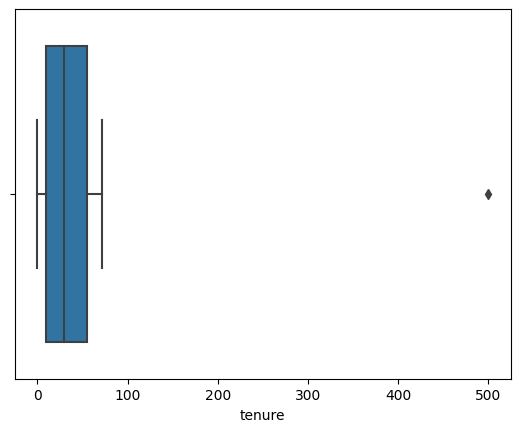

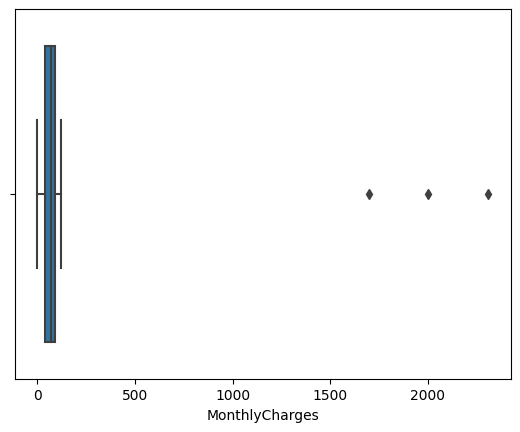

<AxesSubplot: xlabel='TotalCharges'>

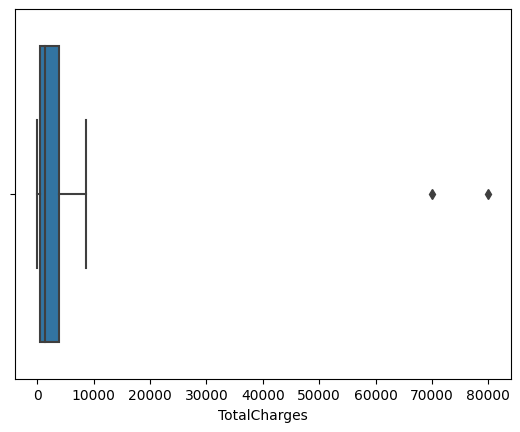

In [14]:
#Mendeteksi Outlier dengan Visualisasi Boxplot

#Creating Box Plot
plt.figure()
sns.boxplot(x=df_customer['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_customer['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_customer['TotalCharges'])

In [15]:
#Mengatasi outlier dengan menggunakan metode interquartile range (IQR)
#Quantile : melihat quantile ke -tertentu dari kolom tenure, MonthlyCharges, dan TotalCharges

Q1 = df_customer[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = df_customer[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
IQR = Q3 - Q1

In [16]:
#Menentukan nilai minimum dan maximum data di tolerir dalam metode IQR

maximum = Q3 + 1.5*IQR
print('\nNilai Maximum dari masing-masing Variable adalah:')
print(maximum)

minimum = Q1 - 1.5*IQR
print('\nNilai Minimum dari masing-masing Variable adalah:')
print(minimum)


Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [17]:
#Mengubah nilai yang di luar range minimum & maximum ke dalam nilai minimum dan maximum
#Mask : mengganti/replace nilai tertentu jika kondisi memenuhi

more_than = df_customer > maximum
lower_than = df_customer < minimum
df_customer = df_customer.mask(more_than, maximum, axis=1)
df_customer = df_customer.mask(lower_than, minimum, axis=1)

C:\Users\ENVY\AppData\Local\Temp\ipykernel_6672\2485530132.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = df_customer > maximum
C:\Users\ENVY\AppData\Local\Temp\ipykernel_6672\2485530132.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = df_customer < minimum


In [18]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_customer[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


Kesimpulan

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

# Menstandardisasi Nilai dari Variable

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

In [19]:
#Mencari nilai data yang tidak standar

#Menampilkan jumlahan nilai data unik sebelum distandardisasi dari kolom yang bersifat kategorik
#Value_counts : menghitung jumlah data unik dari kolom

#Loop : perulangan untuk setiap nama kolom pada list nama kolom
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', col_name)
    print(df_customer[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

In [20]:
#Melakukan Standardisasi kolom kategorik gender, Dependents, Churn, InternetService, StreamingTV, SeniorCitizen dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya
#Standarkan nilai dari ke:
# Wanita -> Female
# Laki-Laki -> Male
# Iya -> Yes
# Churn -> Yes
# Fiber optic & DSL -> Yes
# No internet service -> No
# 0 -> No
# 1 -> Yes
#Replace : mengganti nilai

df_customer = df_customer.replace({
    'gender': {'Wanita': 'Female', 'Laki-Laki':'Male'}, 
    'Dependents': {'Iya': 'Yes'}, 
    'Churn': {'Churn': 'Yes'},
    'InternetService': {'Fiber optic': 'Yes', 'DSL': 'Yes'},
    'StreamingTV': {'No internet service': 'No'},
    'SeniorCitizen': {0: 'No', 1: 'Yes'}
})

#df_customer = df_customer.replace(['Wanita','Laki-Laki','Churn','Iya','Fiber optic','DSL','No internet service',0,1],['Female','Male','Yes','Yes','Yes','Yes','No','No','Yes'])

#Menampilkan jumlahan nilai data unik setelah distandardisasi dari kolom gender, Dependents, Churn
#Value_counts : menghitung jumlah data unik dari kolom

#Loop : perulangan untuk setiap nama kolom pada list nama kolom
for col_name in list(['gender','Dependents','Churn','InternetService','StreamingTV','SeniorCitizen']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0m  Variable', col_name)
    print(df_customer[col_name].value_counts())


Unique Values Count After Standardized   Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized   Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized   Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64

Unique Values Count After Standardized   Variable InternetService
Yes    5445
No     1505
Name: InternetService, dtype: int64

Unique Values Count After Standardized   Variable StreamingTV
No     4279
Yes    2671
Name: StreamingTV, dtype: int64

Unique Values Count After Standardized   Variable SeniorCitizen
No     5822
Yes    1128
Name: SeniorCitizen, dtype: int64


Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:

    Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
    Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
    Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
    
Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.

In [21]:
df_customer.shape

(6950, 22)

# B. Exploratory Data Analysis

Exploratory Data Analysis digunakan untuk memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. EDA dilakukan dengan beberapa cara:

1. Univariat Analysis — analisis deskriptif dengan satu variabel.
2. Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
3. Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

# Prosentase persebaran data Churn dan tidaknya dari seluruh data

Melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan.

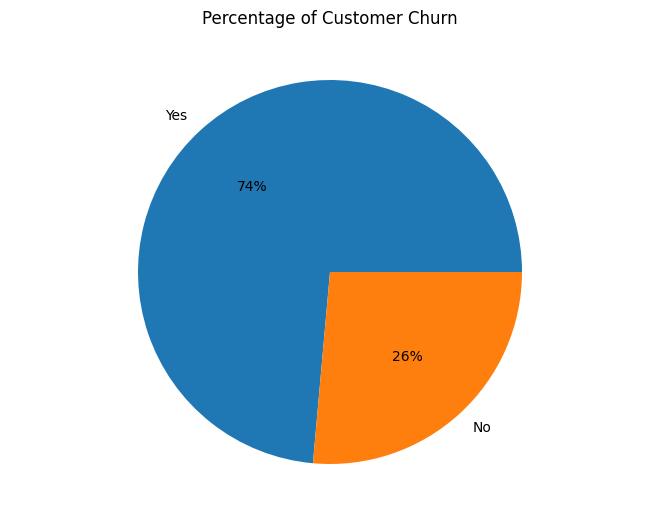

In [22]:
#Value_counts : menghitung jumlah data unik dari kolom
#Pie : membuat pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_customer.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Customer Churn')
plt.show()

# Persebaran data dari variable predictor terhadap label (Churn)

Memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya.

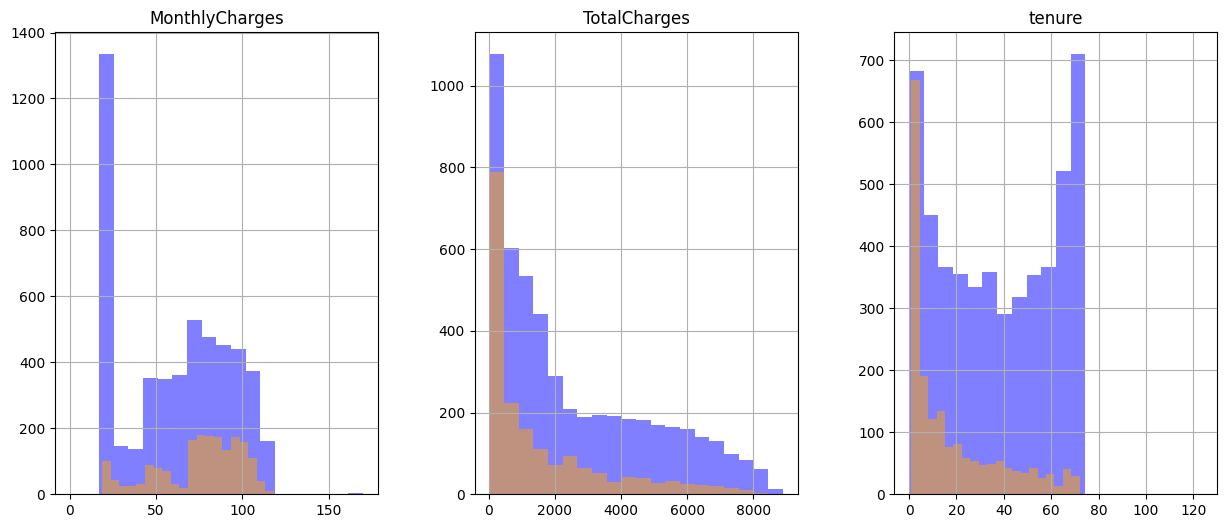

In [23]:
#Subplots : membuat gambar dan satu set subplot
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

df_customer[df_customer.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_customer[df_customer.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

Memilih variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya.

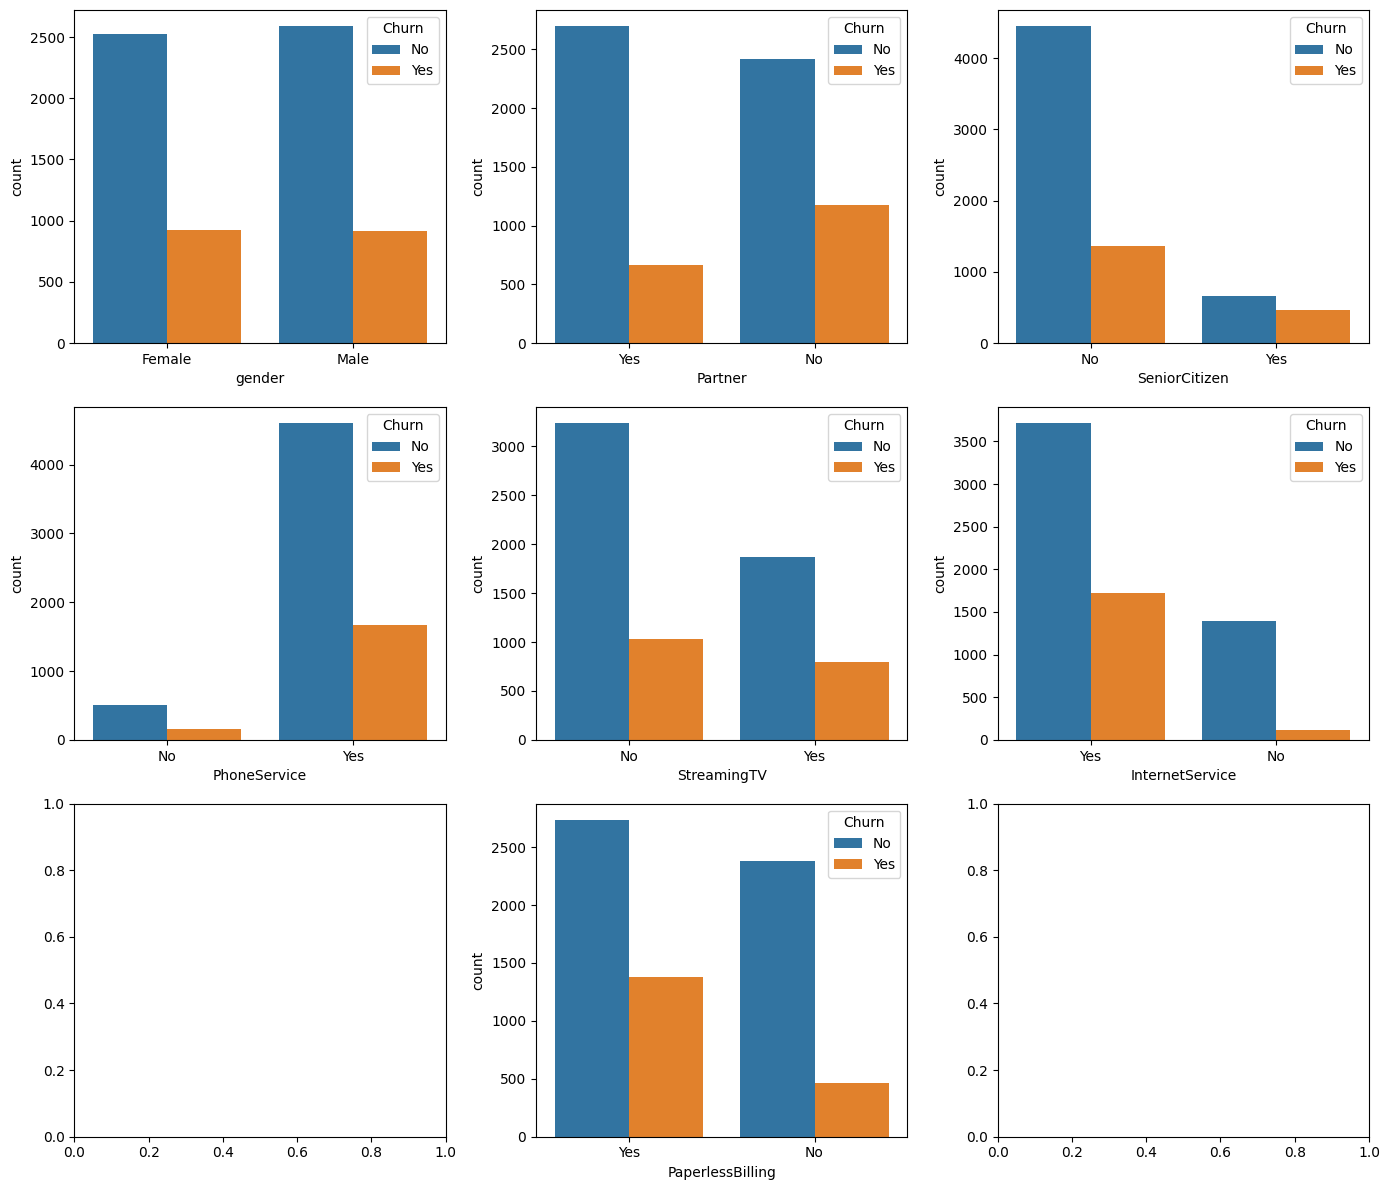

In [24]:
#Countplot : untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_customer, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_customer, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_customer, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_customer, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_customer, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_customer, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_customer, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

- pada tahap C.1 dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.
- pada tahap C.2 dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.
- pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

# C. Data Preprocessing (2)

# Mengapus Kolom

Menghapus kolom yang tidak diikutsertakan dalam pemodelan.

In [25]:
#Drop : menghapus kolom
df_customer_clean = df_customer.drop(['UpdatedAt','customerID','PaymentMethod','Contract','StreamingMovies','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','MultipleLines','Dependents'], axis=1)
#Head : menampilkan 5 baris teratas
df_customer_clean.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1.0,No,Yes,No,Yes,29.85,29.85,No
4727,Male,No,Yes,60.0,Yes,No,No,Yes,20.50,1198.80,No
4738,Male,No,No,5.0,Yes,Yes,Yes,No,104.10,541.90,Yes
4737,Female,No,Yes,72.0,Yes,Yes,Yes,Yes,115.50,8312.75,No
4736,Female,No,Yes,56.0,Yes,Yes,Yes,No,81.25,4620.40,No


In [26]:
df_customer_clean.dtypes

gender               object
SeniorCitizen        object
Partner              object
tenure              float64
PhoneService         object
InternetService      object
StreamingTV          object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Encoding Data

In [27]:
#Astype : mengubah data type kolom
df_customer_clean = df_customer_clean.astype({'tenure': 'int64'})
df_customer_clean.dtypes

gender               object
SeniorCitizen        object
Partner              object
tenure                int64
PhoneService         object
InternetService      object
StreamingTV          object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numerik.

In [28]:
#LabelEncoder : mengkonversi kolom non-numerik menjadi kolom numerikal
#Encoding untuk setiap kolom non-numerik

for column in df_customer_clean.columns :
    if df_customer_clean[column].dtype == np.number:continue
    df_customer_clean[column] = LabelEncoder().fit_transform(df_customer_clean[column])

#Descibe : melihat deskripsi data
df_customer_clean.describe()

C:\Users\ENVY\AppData\Local\Temp\ipykernel_6672\2217151990.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_customer_clean[column].dtype == np.number:continue


,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.783453,0.384317,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.411921,0.486468,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


In [29]:
df_customer_clean.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
tenure                int64
PhoneService          int32
InternetService       int32
StreamingTV           int32
PaperlessBilling      int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

# Train Test Split 

Membagi dataset menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y).

In [30]:
#Train Test Split : membagi data 
#Predictor dan target
x = df_customer_clean.drop('Churn', axis=1)
y = df_customer_clean['Churn']

#Split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Value Counts : mengecek apakah pembagian sudah sama proporsinya
#Menyimpan hasil splitting
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


Setelah kita analisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (customerID) & periode pengambilan datanya (UpdatedAt), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

# D. Pembuatan Model

Membuat model dengan menggunakan beberapa algoritma

# Algoritma Klasifikasi : Logistic Regression

In [31]:
#Train the model
log_model = LogisticRegression(solver='liblinear', max_iter=100).fit(x_train, y_train)

#Predict
y_train_pred = log_model.predict(x_train)

#Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



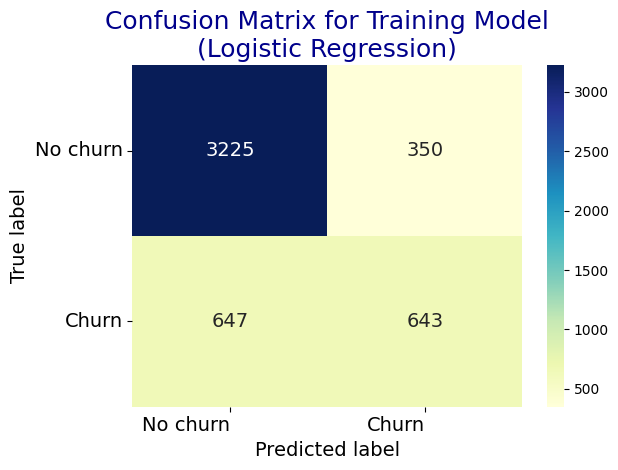

In [32]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
# Predict
y_test_pred = log_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.80      0.79      2085



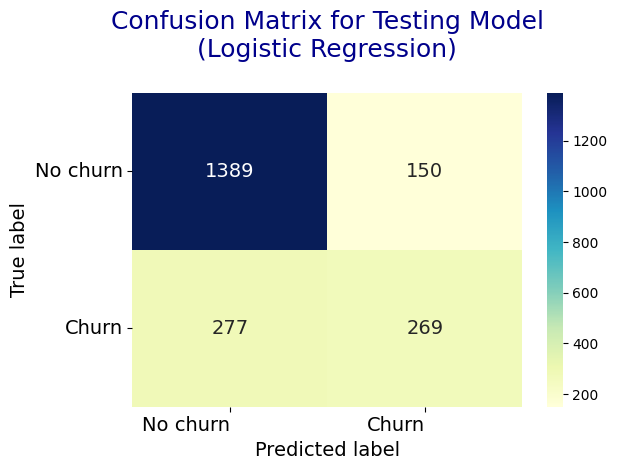

In [35]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Dari hasil dan analisa di atas, maka:

- Jika kita menggunakan menggunakan algoritma logistic regression dengan memanggil LogisticRegression() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
- Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan churn yang sebenernya benar churn adalah 638, tebakan tidak churn yang sebenernya tidak churn adalah 3237, tebakan tidak churn yang sebenernya benar churn adalah 652 dan tebakan churn yang sebenernya tidak churn adalah 338.
- Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 264, tebakan tidak churn yang sebenernya tidak churn adalah 1392, tebakan tidak churn yang sebenernya benar churn adalah 282 dan tebakan churn yang sebenernya tidak churn adalah 146.

# Algoritma Klasifikasi : Random Forest Classifier

In [37]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)

#Predict
y_train_pred = rdf_model.predict(x_train)

#Print classification report 
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



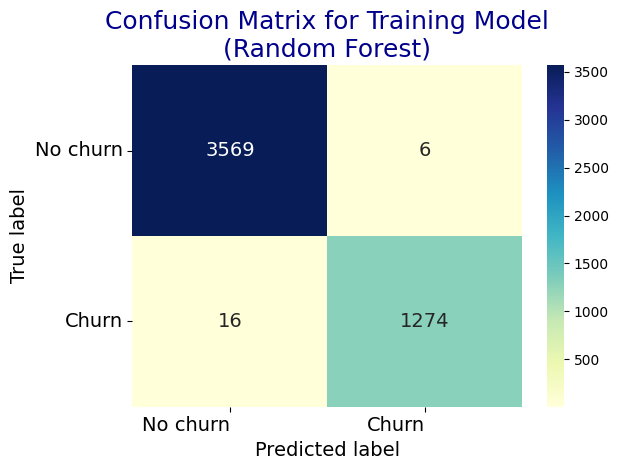

In [38]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
# Predict
y_test_pred = rdf_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.59      0.49      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



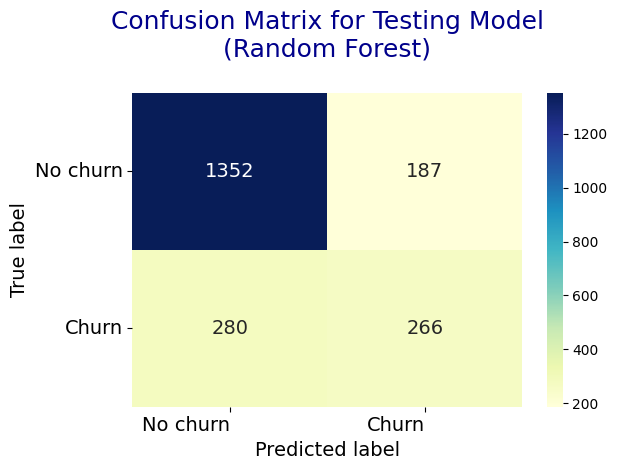

In [40]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Dari hasil dan analisa di atas, maka:

- Jika kita menggunakan menggunakan algoritma Random Forest dengan memanggil RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
- Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan churn yang sebenernya benar churn adalah 1278, tebakan tidak churn yang sebenernya tidak churn adalah 3566, tebakan tidak churn yang sebenernya benar churn adalah 12 dan tebakan churn yang sebenernya tidak churn adalah 9.
- Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 262, tebakan tidak churn yang sebenernya tidak churn adalah 1360, tebakan tidak churn yang sebenernya benar churn adalah 284 dan tebakan churn yang sebenernya tidak churn adalah 179.

# Algoritma Klasifikasi : Gradient Boosting Classifier

In [42]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_train_pred = gbt_model.predict(x_train)

# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



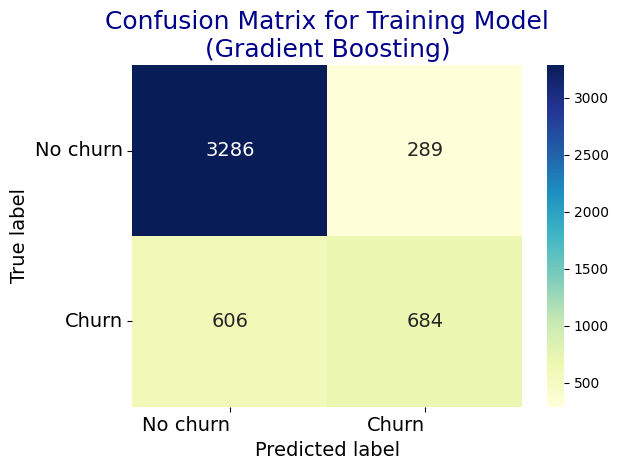

In [43]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
# Predict
y_test_pred = gbt_model.predict(x_test)

# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



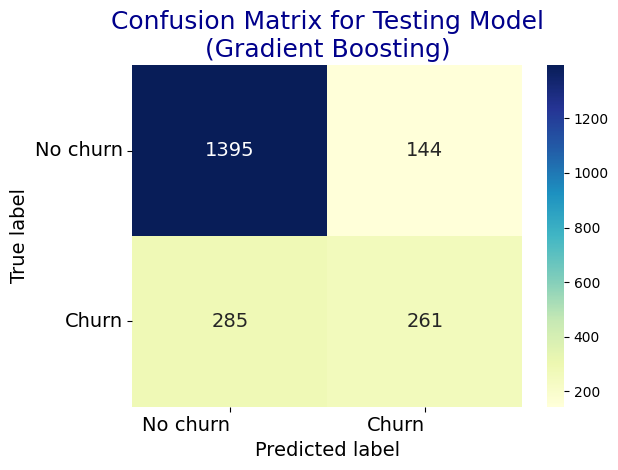

In [45]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Dari hasil dan analisa di atas, maka:

- Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
- Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.
- Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1394, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 145.

# Memilih Model Terbaik

Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

- Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
- Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
- Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

Selanjutnya kita akan menentukan model algoritma terbaik dari model yang sudah di lakukan di atas (Appropriate-Fitting), kemudian kita simpan sebagai file best_model_churn.pkl dengan tujuan untuk deployment model nantinya kita tidak perlu mengulang lagi pemodelan, cukup memanggil file tersebut saja. Simpan di file direktori sesuai dataset berada, kemudian check apakah file tersebut benar tersimpan atau tidak. Gunakan dump() dari pickle untuk menyimpan file.

In [46]:
print(log_model)

LogisticRegression(solver='liblinear')


Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.